In [908]:
#import libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
import pickle
from scipy.stats import norm
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [909]:
# load train set and test set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")


In [910]:
test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [911]:
#filtering out the Apple golden delicious
apples_df_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
apples_df = apples_df_filter.copy()
apples_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [739]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [869]:
apples_df.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [870]:
apples_df['Date'] = pd.to_datetime(apples_df['Date'])
apples_df.dtypes

Province                    object
Container                   object
Size_Grade                  object
Weight_Kg                  float64
Commodities                 object
Date                datetime64[ns]
Low_Price                  float64
High_Price                 float64
Sales_Total                float64
Total_Qty_Sold               int64
Total_Kg_Sold              float64
Stock_On_Hand                int64
avg_price_per_kg           float64
dtype: object

In [871]:
test['Date'] = pd.to_datetime(test['Date'])
test.dtypes

Index                      int64
Province                  object
Container                 object
Size_Grade                object
Weight_Kg                float64
Commodities               object
Date              datetime64[ns]
Low_Price                float64
High_Price               float64
Sales_Total              float64
Total_Qty_Sold             int64
Total_Kg_Sold            float64
Stock_On_Hand              int64
dtype: object

(array([18231., 18262., 18293., 18322., 18353., 18383., 18414., 18444.,
        18475., 18506., 18536.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

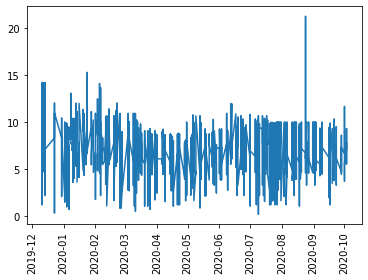

In [872]:
apples_df = apples_df.sort_values('Date', ascending=True)
plt.plot(apples_df['Date'], apples_df['avg_price_per_kg'])
plt.xticks(rotation='vertical')

In [873]:
apples_df[apples_df['Date'] == '2020-10-03T00:00:00.000000000']

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
24034,CAPE,JE090,2L,9.0,APPLE GOLDEN DELICIOUS,2020-10-03,50.0,70.0,11150.0,173,1557.0,134,7.16
10389,WEST COAST,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-10-03,150.0,160.0,1590.0,10,183.0,45,8.69
30425,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-10-03,127.0,140.0,7277.0,54,988.2,463,7.36
60269,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-10-03,50.0,75.0,29870.0,455,4095.0,217,7.29
46789,CAPE,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,80.0,120.0,26536.0,275,3300.0,529,8.04
38819,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-10-03,50.0,50.0,250.0,5,45.0,0,5.56
10069,EASTERN CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,60.0,80.0,2236.0,29,348.0,415,6.43
42418,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,112.0,112.0,2912.0,26,312.0,219,9.33
32193,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,96.0,96.0,6144.0,64,768.0,0,8.00
47554,WEST COAST,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-10-03,130.0,130.0,1300.0,10,183.0,0,7.10


In [874]:
# Extract month
#if statemts
apples_df["month"] = apples_df["Date"].dt.month
apples_df.loc[apples_df['month'] == 8,'season'] ='spring'
apples_df.loc[apples_df['month'] == 9,'season'] ='spring'
apples_df.loc[apples_df['month'] == 10,'season'] ='spring'
apples_df.loc[apples_df['month'] == 12,'season'] ='summer'
apples_df.loc[apples_df['month'] == 1,'season'] ='summer'
apples_df.loc[apples_df['month'] == 2,'season'] ='summer'
apples_df.loc[apples_df['month'] == 5,'season'] ='autumn'
apples_df.loc[apples_df['month'] == 4,'season'] ='autumn'
apples_df.loc[apples_df['month'] == 3,'season'] ='autumn'
apples_df.loc[apples_df['month'] == 6,'season'] ='winter'
apples_df.loc[apples_df['month'] == 8,'season'] ='winter'
apples_df.loc[apples_df['month'] == 7,'season'] ='winter'
apples_df

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,season
32221,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2019-12-11,168.0,168.0,2016.0,12,144.0,337,14.00,12,summer
30171,NATAL,IA400,2S,400.0,APPLE GOLDEN DELICIOUS,2019-12-11,500.0,500.0,1500.0,3,1200.0,0,1.25,12,summer
53893,CAPE,EC120,1L,12.0,APPLE GOLDEN DELICIOUS,2019-12-11,100.0,112.0,12368.0,116,1392.0,76,8.89,12,summer
64177,CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2019-12-11,2200.0,2200.0,66000.0,30,12000.0,0,5.50,12,summer
35634,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2019-12-11,170.0,180.0,15350.0,88,1610.4,1171,9.53,12,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,EASTERN CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,60.0,80.0,2236.0,29,348.0,415,6.43,10,spring
42418,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,112.0,112.0,2912.0,26,312.0,219,9.33,10,spring
32193,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-10-03,96.0,96.0,6144.0,64,768.0,0,8.00,10,spring
47554,WEST COAST,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-10-03,130.0,130.0,1300.0,10,183.0,0,7.10,10,spring


In [879]:
# Extract month
test["month"] = test["Date"].dt.month
test.loc[test['month'] == 11,'season'] ='spring'
test.loc[test['month'] == 10,'season'] ='spring'
test.loc[test['month'] == 9,'season'] ='spring'
test.loc[test['month'] == 1,'season'] ='summer'
test.loc[test['month'] == 2,'season'] ='summer'
test.loc[test['month'] == 12,'season'] ='summer'
test.loc[test['month'] == 5,'season'] ='autumn'
test.loc[test['month'] == 4,'season'] ='autumn'
test.loc[test['month'] == 3,'season'] ='autumn'
test.loc[test['month'] == 8,'season'] ='winter'
test.loc[test['month'] == 7,'season'] ='winter'
test.loc[test['month'] == 6,'season'] ='winter'
test

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,month,season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,2.484907,APPLE GOLDEN DELICIOUS,2020-07-09,4.852030,4.912655,8.518792,3.637586,6.122493,0.000000,7,winter
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,2.906901,APPLE GOLDEN DELICIOUS,2020-01-20,5.393628,5.393628,7.473069,2.079442,4.986343,0.693147,1,summer
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,2.484907,APPLE GOLDEN DELICIOUS,2020-08-19,4.787492,4.787492,6.579251,1.791759,4.276666,3.806662,8,winter
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,2.906901,APPLE GOLDEN DELICIOUS,2020-05-06,5.075174,5.075174,5.075174,0.000000,2.906901,2.079442,5,autumn
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,2.906901,APPLE GOLDEN DELICIOUS,2020-05-04,4.941642,5.075174,9.556763,4.605170,7.512071,2.944439,5,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,681,W.CAPE-BERGRIVER ETC,JE090,2S,2.197225,APPLE GOLDEN DELICIOUS,2020-05-26,3.401197,3.401197,7.185387,3.784190,5.981414,6.752270,5,autumn
681,682,CAPE,EC120,1M,2.484907,APPLE GOLDEN DELICIOUS,2020-01-10,3.912023,4.882802,8.746716,3.951244,6.436150,6.665684,1,summer
682,683,W.CAPE-BERGRIVER ETC,JE090,2X,2.197225,APPLE GOLDEN DELICIOUS,2020-06-03,4.007333,4.007333,5.393628,1.386294,3.583519,5.135798,6,winter
683,684,CAPE,M4183,1S,2.906901,APPLE GOLDEN DELICIOUS,2020-02-22,4.787492,5.010635,10.234229,5.308268,8.215169,0.000000,2,summer


### checking for  skewness

In [880]:
apples_df.skew()

Weight_Kg           2.624779
Low_Price           1.141070
High_Price          1.089270
Sales_Total        -0.482850
Total_Qty_Sold     -0.362500
Total_Kg_Sold      -0.411865
Stock_On_Hand      -0.511006
avg_price_per_kg    0.082452
month              -1.020877
dtype: float64

In [881]:
test.skew()

Index             0.000000
Weight_Kg         2.995465
Low_Price         1.631810
High_Price        1.443425
Sales_Total      -0.397272
Total_Qty_Sold   -0.326266
Total_Kg_Sold    -0.376128
Stock_On_Hand    -0.648157
month             0.194173
dtype: float64

###  log transformation on categorical variables

In [882]:
cats = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand','month']
for a in cats:
    apples_df[a] = apples_df[a].map(lambda i: np.log(i) if i > 0 else 0)
    test[a] = test[a].map(lambda i: np.log(i) if i > 0 else 0)

In [883]:
test.skew()

Index             0.000000
Weight_Kg         1.554742
Low_Price         0.532294
High_Price        0.320049
Sales_Total      -1.054176
Total_Qty_Sold   -1.087908
Total_Kg_Sold    -1.122880
Stock_On_Hand    -1.074495
month            -0.956257
dtype: float64

In [884]:
apples_df.skew()

Weight_Kg           1.335019
Low_Price          -0.655797
High_Price         -0.496529
Sales_Total        -1.526268
Total_Qty_Sold     -1.089523
Total_Kg_Sold      -1.404578
Stock_On_Hand      -0.877313
avg_price_per_kg    0.082452
month              -0.892553
dtype: float64

### Removing Outliers

In [892]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

apples_df = apples_df[~((apples_df < (Q1 - 1.5 * IQR)) |(apples_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Encoding Categorical variables

In [757]:
apples_df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
month               0
season              0
dtype: int64

In [758]:
apples_df


,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,season
32221,W.CAPE-BERGRIVER ETC,EC120,1M,2.484907,5.123964,5.123964,7.608871,2.484907,4.969813,5.820083,14.00,12,summer
30171,NATAL,IA400,2S,5.991465,6.214608,6.214608,7.313220,1.098612,7.090077,0.000000,1.25,12,summer
53893,CAPE,EC120,1L,2.484907,4.605170,4.718499,9.422868,4.753590,7.238497,4.330733,8.89,12,summer
64177,CAPE,IA400,1S,5.991465,7.696213,7.696213,11.097410,3.401197,9.392662,0.000000,5.50,12,summer
35634,CAPE,M4183,1S,2.906901,5.135798,5.192957,9.638871,4.477337,7.384238,7.065613,9.53,12,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,EASTERN CAPE,EC120,1M,2.484907,4.094345,4.382027,7.712444,3.367296,5.852202,6.028279,6.43,10,spring
42418,W.CAPE-BERGRIVER ETC,EC120,1S,2.484907,4.718499,4.718499,7.976595,3.258097,5.743003,5.389072,9.33,10,spring
32193,NATAL,EC120,1S,2.484907,4.564348,4.564348,8.723231,4.158883,6.643790,0.000000,8.00,10,spring
47554,WEST COAST,M4183,1S,2.906901,4.867534,4.867534,7.170120,2.302585,5.209486,0.000000,7.10,10,spring


In [612]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,month,season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,2.484907,APPLE GOLDEN DELICIOUS,2020-07-09,4.852030,4.912655,8.518792,3.637586,6.122493,0.000000,7,summer
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,2.906901,APPLE GOLDEN DELICIOUS,2020-01-20,5.393628,5.393628,7.473069,2.079442,4.986343,0.693147,1,winter
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,2.484907,APPLE GOLDEN DELICIOUS,2020-08-19,4.787492,4.787492,6.579251,1.791759,4.276666,3.806662,8,summer
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,2.906901,APPLE GOLDEN DELICIOUS,2020-05-06,5.075174,5.075174,5.075174,0.000000,2.906901,2.079442,5,spring
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,2.906901,APPLE GOLDEN DELICIOUS,2020-05-04,4.941642,5.075174,9.556763,4.605170,7.512071,2.944439,5,spring


In [613]:
test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
month             0
season            0
dtype: int64

In [614]:
apples_df

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,season
32221,W.CAPE-BERGRIVER ETC,EC120,1M,2.484907,APPLE GOLDEN DELICIOUS,2019-12-11,5.123964,5.123964,7.608871,2.484907,4.969813,5.820083,14.00,12,winter
30171,NATAL,IA400,2S,5.991465,APPLE GOLDEN DELICIOUS,2019-12-11,6.214608,6.214608,7.313220,1.098612,7.090077,0.000000,1.25,12,winter
53893,CAPE,EC120,1L,2.484907,APPLE GOLDEN DELICIOUS,2019-12-11,4.605170,4.718499,9.422868,4.753590,7.238497,4.330733,8.89,12,winter
64177,CAPE,IA400,1S,5.991465,APPLE GOLDEN DELICIOUS,2019-12-11,7.696213,7.696213,11.097410,3.401197,9.392662,0.000000,5.50,12,winter
35634,CAPE,M4183,1S,2.906901,APPLE GOLDEN DELICIOUS,2019-12-11,5.135798,5.192957,9.638871,4.477337,7.384238,7.065613,9.53,12,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,EASTERN CAPE,EC120,1M,2.484907,APPLE GOLDEN DELICIOUS,2020-10-03,4.094345,4.382027,7.712444,3.367296,5.852202,6.028279,6.43,10,autumn
42418,W.CAPE-BERGRIVER ETC,EC120,1S,2.484907,APPLE GOLDEN DELICIOUS,2020-10-03,4.718499,4.718499,7.976595,3.258097,5.743003,5.389072,9.33,10,autumn
32193,NATAL,EC120,1S,2.484907,APPLE GOLDEN DELICIOUS,2020-10-03,4.564348,4.564348,8.723231,4.158883,6.643790,0.000000,8.00,10,autumn
47554,WEST COAST,M4183,1S,2.906901,APPLE GOLDEN DELICIOUS,2020-10-03,4.867534,4.867534,7.170120,2.302585,5.209486,0.000000,7.10,10,autumn


In [283]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,month,season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,2.484907,4.852030,4.912655,8.518792,3.637586,6.122493,0.000000,7,summer
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,2.906901,5.393628,5.393628,7.473069,2.079442,4.986343,0.693147,1,winter
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,2.484907,4.787492,4.787492,6.579251,1.791759,4.276666,3.806662,8,summer
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,2.906901,5.075174,5.075174,5.075174,0.000000,2.906901,2.079442,5,spring
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,2.906901,4.941642,5.075174,9.556763,4.605170,7.512071,2.944439,5,spring


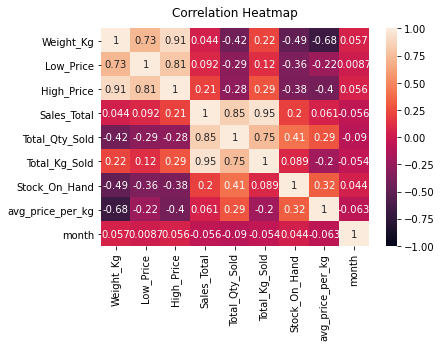

In [893]:
#correlation matrix
heatmap = sns.heatmap(apples_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [593]:
apples_df

,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,spring,summer,winter
32221,APPLE GOLDEN DELICIOUS,2019-12-11,5.123964,5.123964,7.608871,2.484907,4.969813,5.820083,14.00,0,0,1
30171,APPLE GOLDEN DELICIOUS,2019-12-11,6.214608,6.214608,7.313220,1.098612,7.090077,0.000000,1.25,0,0,1
53893,APPLE GOLDEN DELICIOUS,2019-12-11,4.605170,4.718499,9.422868,4.753590,7.238497,4.330733,8.89,0,0,1
64177,APPLE GOLDEN DELICIOUS,2019-12-11,7.696213,7.696213,11.097410,3.401197,9.392662,0.000000,5.50,0,0,1
35634,APPLE GOLDEN DELICIOUS,2019-12-11,5.135798,5.192957,9.638871,4.477337,7.384238,7.065613,9.53,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10069,APPLE GOLDEN DELICIOUS,2020-10-03,4.094345,4.382027,7.712444,3.367296,5.852202,6.028279,6.43,0,0,0
42418,APPLE GOLDEN DELICIOUS,2020-10-03,4.718499,4.718499,7.976595,3.258097,5.743003,5.389072,9.33,0,0,0
32193,APPLE GOLDEN DELICIOUS,2020-10-03,4.564348,4.564348,8.723231,4.158883,6.643790,0.000000,8.00,0,0,0
47554,APPLE GOLDEN DELICIOUS,2020-10-03,4.867534,4.867534,7.170120,2.302585,5.209486,0.000000,7.10,0,0,0


In [894]:
cat_columns = ['Weight_Kg', 'month']

In [895]:
def cat_multcols(allcolumns):
    df_final = apples_df
    i=0
    for fields in allcolumns:
        
        print(fields)
        df1=pd.get_dummies(apples_df[fields],drop_first=True)
        
        apples_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([apples_df,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([apples_df,df_final],axis=1)
        
    return df_final

In [896]:
def cattest_multcols(allcolumns):
    df_final = test
    i=0
    for fields in allcolumns:
        
        print(fields)
        df1=pd.get_dummies(test[fields],drop_first=True)
        
        test.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([test,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([test,df_final],axis=1)
        
    return df_final

In [897]:
apples_df = cat_multcols(cat_columns)

Weight_Kg
month


In [898]:
test = cattest_multcols(cat_columns)

Weight_Kg
month


In [899]:
apples_df.shape

(726, 24)

In [900]:
test.shape

(685, 24)

In [901]:
apples_df =apples_df.loc[:,~apples_df.columns.duplicated()]

In [902]:
test =test.loc[:,~test.columns.duplicated()]

In [886]:
apples_df.drop(['Commodities', 'Date', 'season', 'Province','Size_Grade','Container'], 1,inplace = True)

In [887]:
test.drop(['Commodities', 'Date', 'season', 'Province','Size_Grade','Container'], 1,inplace = True)

In [903]:
X = apples_df.drop(['avg_price_per_kg'], 1)
y = apples_df['avg_price_per_kg'].values

x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [904]:
#X_train = apples_df.drop(['avg_price_per_kg'], axis=1)
#Y_train = apples_df["avg_price_per_kg"]
x_test  = test.drop("Index", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((580, 16), (580,), (146, 16), (146,))

### XGboost

In [905]:
xgb = XGBRegressor(learning_rate= 0.3, n_estimators= 1000, max_depth = 3 , min_child_weight = 2, max_delta_step = 1, subsample = 0.73, random_state=42)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=1, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.73,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [906]:
y_pred = xgb.predict(X_test)
y_pred

array([ 8.386398 ,  9.020664 ,  8.130372 ,  1.3877245,  4.341897 ,
        9.733902 ,  7.2007575, 11.198281 ,  6.098092 ,  6.031117 ,
        8.777255 ,  9.146878 ,  9.2738   ,  7.882051 , 10.3429   ,
       10.328    ,  4.76002  ,  4.8128395,  9.96816  ,  8.07095  ,
       11.127508 ,  8.873359 , 10.094478 ,  8.596544 ,  9.371466 ,
        9.896556 ,  6.1596675,  6.1843553,  8.794609 , 10.851113 ,
        7.9237127,  7.007869 ,  8.94442  ,  7.102111 ,  8.79154  ,
        7.603307 ,  4.9407067,  8.443188 ,  5.134324 ,  4.405086 ,
        4.400479 ,  8.797246 ,  1.6417264,  6.721597 ,  7.2207527,
        9.340713 ,  8.263441 , 10.04394  ,  4.3231463,  8.157832 ,
        9.85385  ,  2.000834 ,  7.9101562,  4.0334764,  7.9130206,
        7.098895 ,  8.783376 , 10.497238 ,  9.892471 ,  1.2471652,
        8.575528 ,  8.543607 ,  8.548021 ,  5.405683 ,  9.66055  ,
        4.024241 ,  5.4369407,  7.728649 ,  5.5549345, 10.390701 ,
        7.015453 ,  8.517559 , 11.100591 ,  7.1279206,  7.4238

In [907]:
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 0.6763633688678892


In [321]:
import pickle
file = 'Xgboost_model.pkl'
pickle.dump(xgb, open(file,'wb'))

## Decision Tress

In [849]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=1000)

In [850]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1000)

In [851]:
# get predictions for test data
y2_pred = regr_tree.predict(X_test)
y2_pred
# calculate MSE
MSE2 = mean_squared_error(y2_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE2))

Regression Decision Tree model RMSE is: 1.1482379427985423


## Elastic net

In [860]:
regr = ElasticNet(random_state=50)

In [861]:
regr.fit(X_train, y_train)

ElasticNet(random_state=50)

In [857]:
y3_pred = regr.predict(X_test)
y3_pred

array([7.44745629, 7.2129107 , 7.36588833, 6.71723614, 6.62125229,
       7.17562145, 7.51244605, 7.34134579, 7.5046508 , 7.58545697,
       7.22539752, 7.29545989, 7.28916434, 7.41362946, 7.35950601,
       7.34724297, 6.39980646, 6.39139324, 7.40729839, 7.32938109,
       7.34694692, 7.42738618, 7.39412252, 7.35293693, 7.3287396 ,
       7.20119035, 7.61548271, 7.50535387, 7.45922902, 7.40128624,
       7.51238009, 7.37268624, 7.49234434, 7.33534991, 7.36677705,
       7.49849902, 6.35541719, 7.46789969, 7.5357342 , 6.45118106,
       7.69143542, 7.50126333, 7.75243699, 7.59384729, 7.36741474,
       7.19300159, 7.48120372, 7.20270538, 7.61538343, 7.45114888,
       7.37465115, 6.49290785, 7.49470574, 7.77073728, 7.54770574,
       7.54955378, 7.45005256, 7.17385742, 7.33577119, 6.67772215,
       7.37340554, 7.52109095, 7.4067176 , 7.5929011 , 7.26847292,
       7.2883555 , 7.44152042, 7.51208993, 7.32068995, 7.42056354,
       7.59827745, 7.49664578, 7.34983958, 7.49930857, 7.39174

In [862]:
# calculate MSE
MSE3 = mean_squared_error(y3_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE3))

Regression Decision Tree model RMSE is: 2.166629049997285


## Gradientboost

In [863]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [864]:
clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [436]:
submission = pd.DataFrame({
        "Index": test["Index"],
        "avg_price_per_kg": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [411]:
submission

,Index,avg_price_per_kg
0,1,10.028472
1,2,12.374708
2,3,9.916717
3,4,8.600108
4,5,7.706383
...,...,...
680,681,3.467510
681,682,10.168788
682,683,6.065759
683,684,7.356278
